Train shape: (4459, 2)
Test shape: (1115, 2)
                                                 sms  label
0                 Ok i am on the way to home hi hi\n      0
1  Ur balance is now £500. Ur next question is: W...      1
2  I'm tired of arguing with you about this week ...      0
3    Tell them the drug dealer's getting impatient\n      0
4  Hmmm... Guess we can go 4 kb n power yoga... H...      0

==== Thông tin dữ liệu ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     4459 non-null   object
 1   label   4459 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 69.8+ KB
None

==== Thống kê dữ liệu ====
             label
count  4459.000000
mean      0.134111
std       0.340810
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

==== Phân bố nhãn ====
label
0    3861
1     598
Name: count

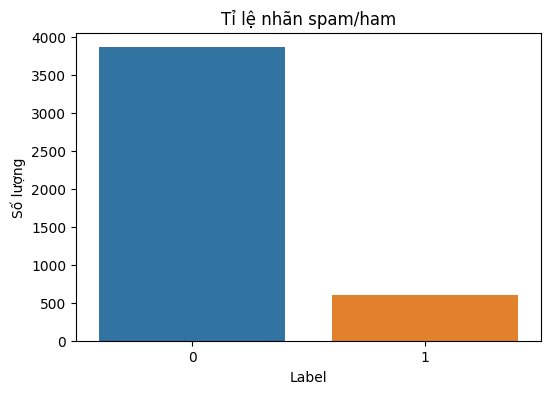


==== Một vài mẫu SMS ====
Spam examples:
Series([], Name: sms, dtype: object) 

Ham examples:
Series([], Name: sms, dtype: object)
Validation Accuracy: 0.9573991031390134
✅ File submission.csv đã được tạo!
   id  label
0   0      0
1   1      0
2   2      0
3   3      1
4   4      0

==== EDA: Thống kê nhãn ====
label
0    3861
1     598
Name: count, dtype: int64


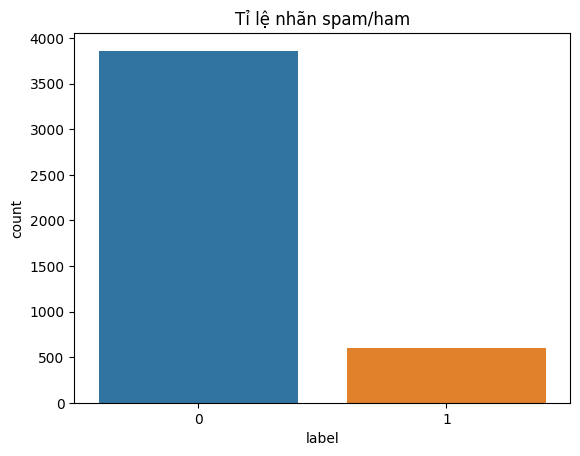


==== Một vài SMS mẫu ====
Series([], Name: sms, dtype: object) 

Series([], Name: sms, dtype: object)

==== So sánh các mô hình ====

==== Naive Bayes ====
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       772
           1       1.00      0.68      0.81       120

    accuracy                           0.96       892
   macro avg       0.98      0.84      0.89       892
weighted avg       0.96      0.96      0.95       892



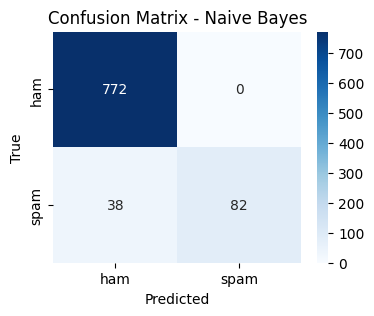


==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       772
           1       0.88      0.96      0.92       120

    accuracy                           0.98       892
   macro avg       0.94      0.97      0.95       892
weighted avg       0.98      0.98      0.98       892



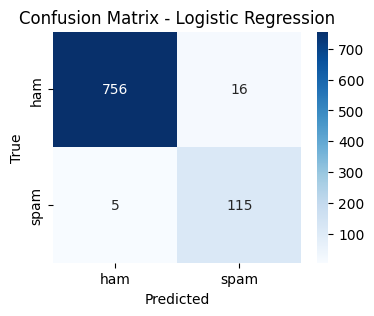


==== SVM (LinearSVC) ====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       772
           1       0.97      0.95      0.96       120

    accuracy                           0.99       892
   macro avg       0.98      0.97      0.98       892
weighted avg       0.99      0.99      0.99       892



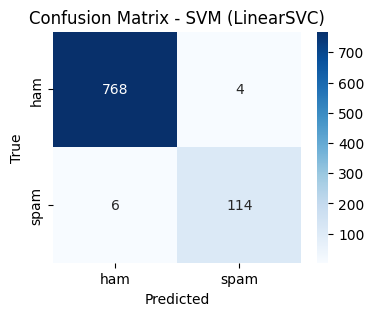


Kết quả Accuracy trên tập validation:
Naive Bayes: 0.9574
Logistic Regression: 0.9765
SVM (LinearSVC): 0.9888

✅ Mô hình tốt nhất: SVM (LinearSVC)


In [1]:
# ================== IMPORT ==================
import pandas as pd
import numpy as np
import re, string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# ================== LOAD DATA ==================
train = pd.read_csv("/kaggle/input/spam-message-classification/train.csv")   # đường dẫn Kaggle
test = pd.read_csv("/kaggle/input/spam-message-classification/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.head())

# ================== KHÁM PHÁ DỮ LIỆU (EDA) ==================
print("\n==== Thông tin dữ liệu ====")
print(train.info())

print("\n==== Thống kê dữ liệu ====")
print(train.describe())

print("\n==== Phân bố nhãn ====")
print(train['label'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=train)
plt.title("Tỉ lệ nhãn spam/ham")
plt.xlabel("Label")
plt.ylabel("Số lượng")
plt.show()

print("\n==== Một vài mẫu SMS ====")
print("Spam examples:")
print(train[train['label'] == "spam"]["sms"].head(), "\n")
print("Ham examples:")
print(train[train['label'] == "ham"]["sms"].head())

# ================== TIỀN XỬ LÝ ==================
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # bỏ số
    text = text.translate(str.maketrans('', '', string.punctuation)) # bỏ dấu câu
    text = text.strip()
    return text

train["sms_clean"] = train["sms"].apply(clean_text)
test["sms_clean"] = test["sms"].apply(clean_text)

# ================== CHIA TRAIN / VALIDATION ==================
X = train["sms_clean"]
y = train["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================== TF-IDF VECTORIZE ==================
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test["sms_clean"])

# ================== TRAIN MODEL (Naive Bayes) ==================
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# ================== VALIDATION ==================
y_val_pred = model.predict(X_val_vec)
acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", acc)

# ================== PREDICT TEST ==================
y_test_pred = model.predict(X_test_vec)

# ================== SUBMISSION FILE ==================
submission = pd.DataFrame({
    "id": test["id"],
    "label": y_test_pred
})

submission.to_csv("submission.csv", index=False)
print("✅ File submission.csv đã được tạo!")
print(submission.head())

# ================== PHÂN TÍCH BỔ SUNG ==================
print("\n==== EDA: Thống kê nhãn ====")
print(train['label'].value_counts())

sns.countplot(x="label", data=train)
plt.title("Tỉ lệ nhãn spam/ham")
plt.show()

print("\n==== Một vài SMS mẫu ====")
print(train[train['label']=="spam"]["sms"].head(), "\n")
print(train[train['label']=="ham"]["sms"].head())

# ---- Huấn luyện và đánh giá nhiều mô hình ----
print("\n==== So sánh các mô hình ====")
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_val_pred_nb = nb_model.predict(X_val_vec)

models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "SVM (LinearSVC)": LinearSVC(class_weight="balanced", max_iter=10000)
}

results = {}

for name, clf in models.items():
    print(f"\n==== {name} ====")
    if name == "Naive Bayes":
        y_pred = y_val_pred_nb
    else:
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_val_vec)
    
    print(classification_report(y_val, y_pred))
    
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print("\nKết quả Accuracy trên tập validation:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

best_model_name = max(results, key=results.get)
print(f"\n✅ Mô hình tốt nhất: {best_model_name}")
